In [2]:
import pandas as pd
df=pd.read_excel(r"C:\Users\polpi\Desktop\data science\assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

C:\Users\polpi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


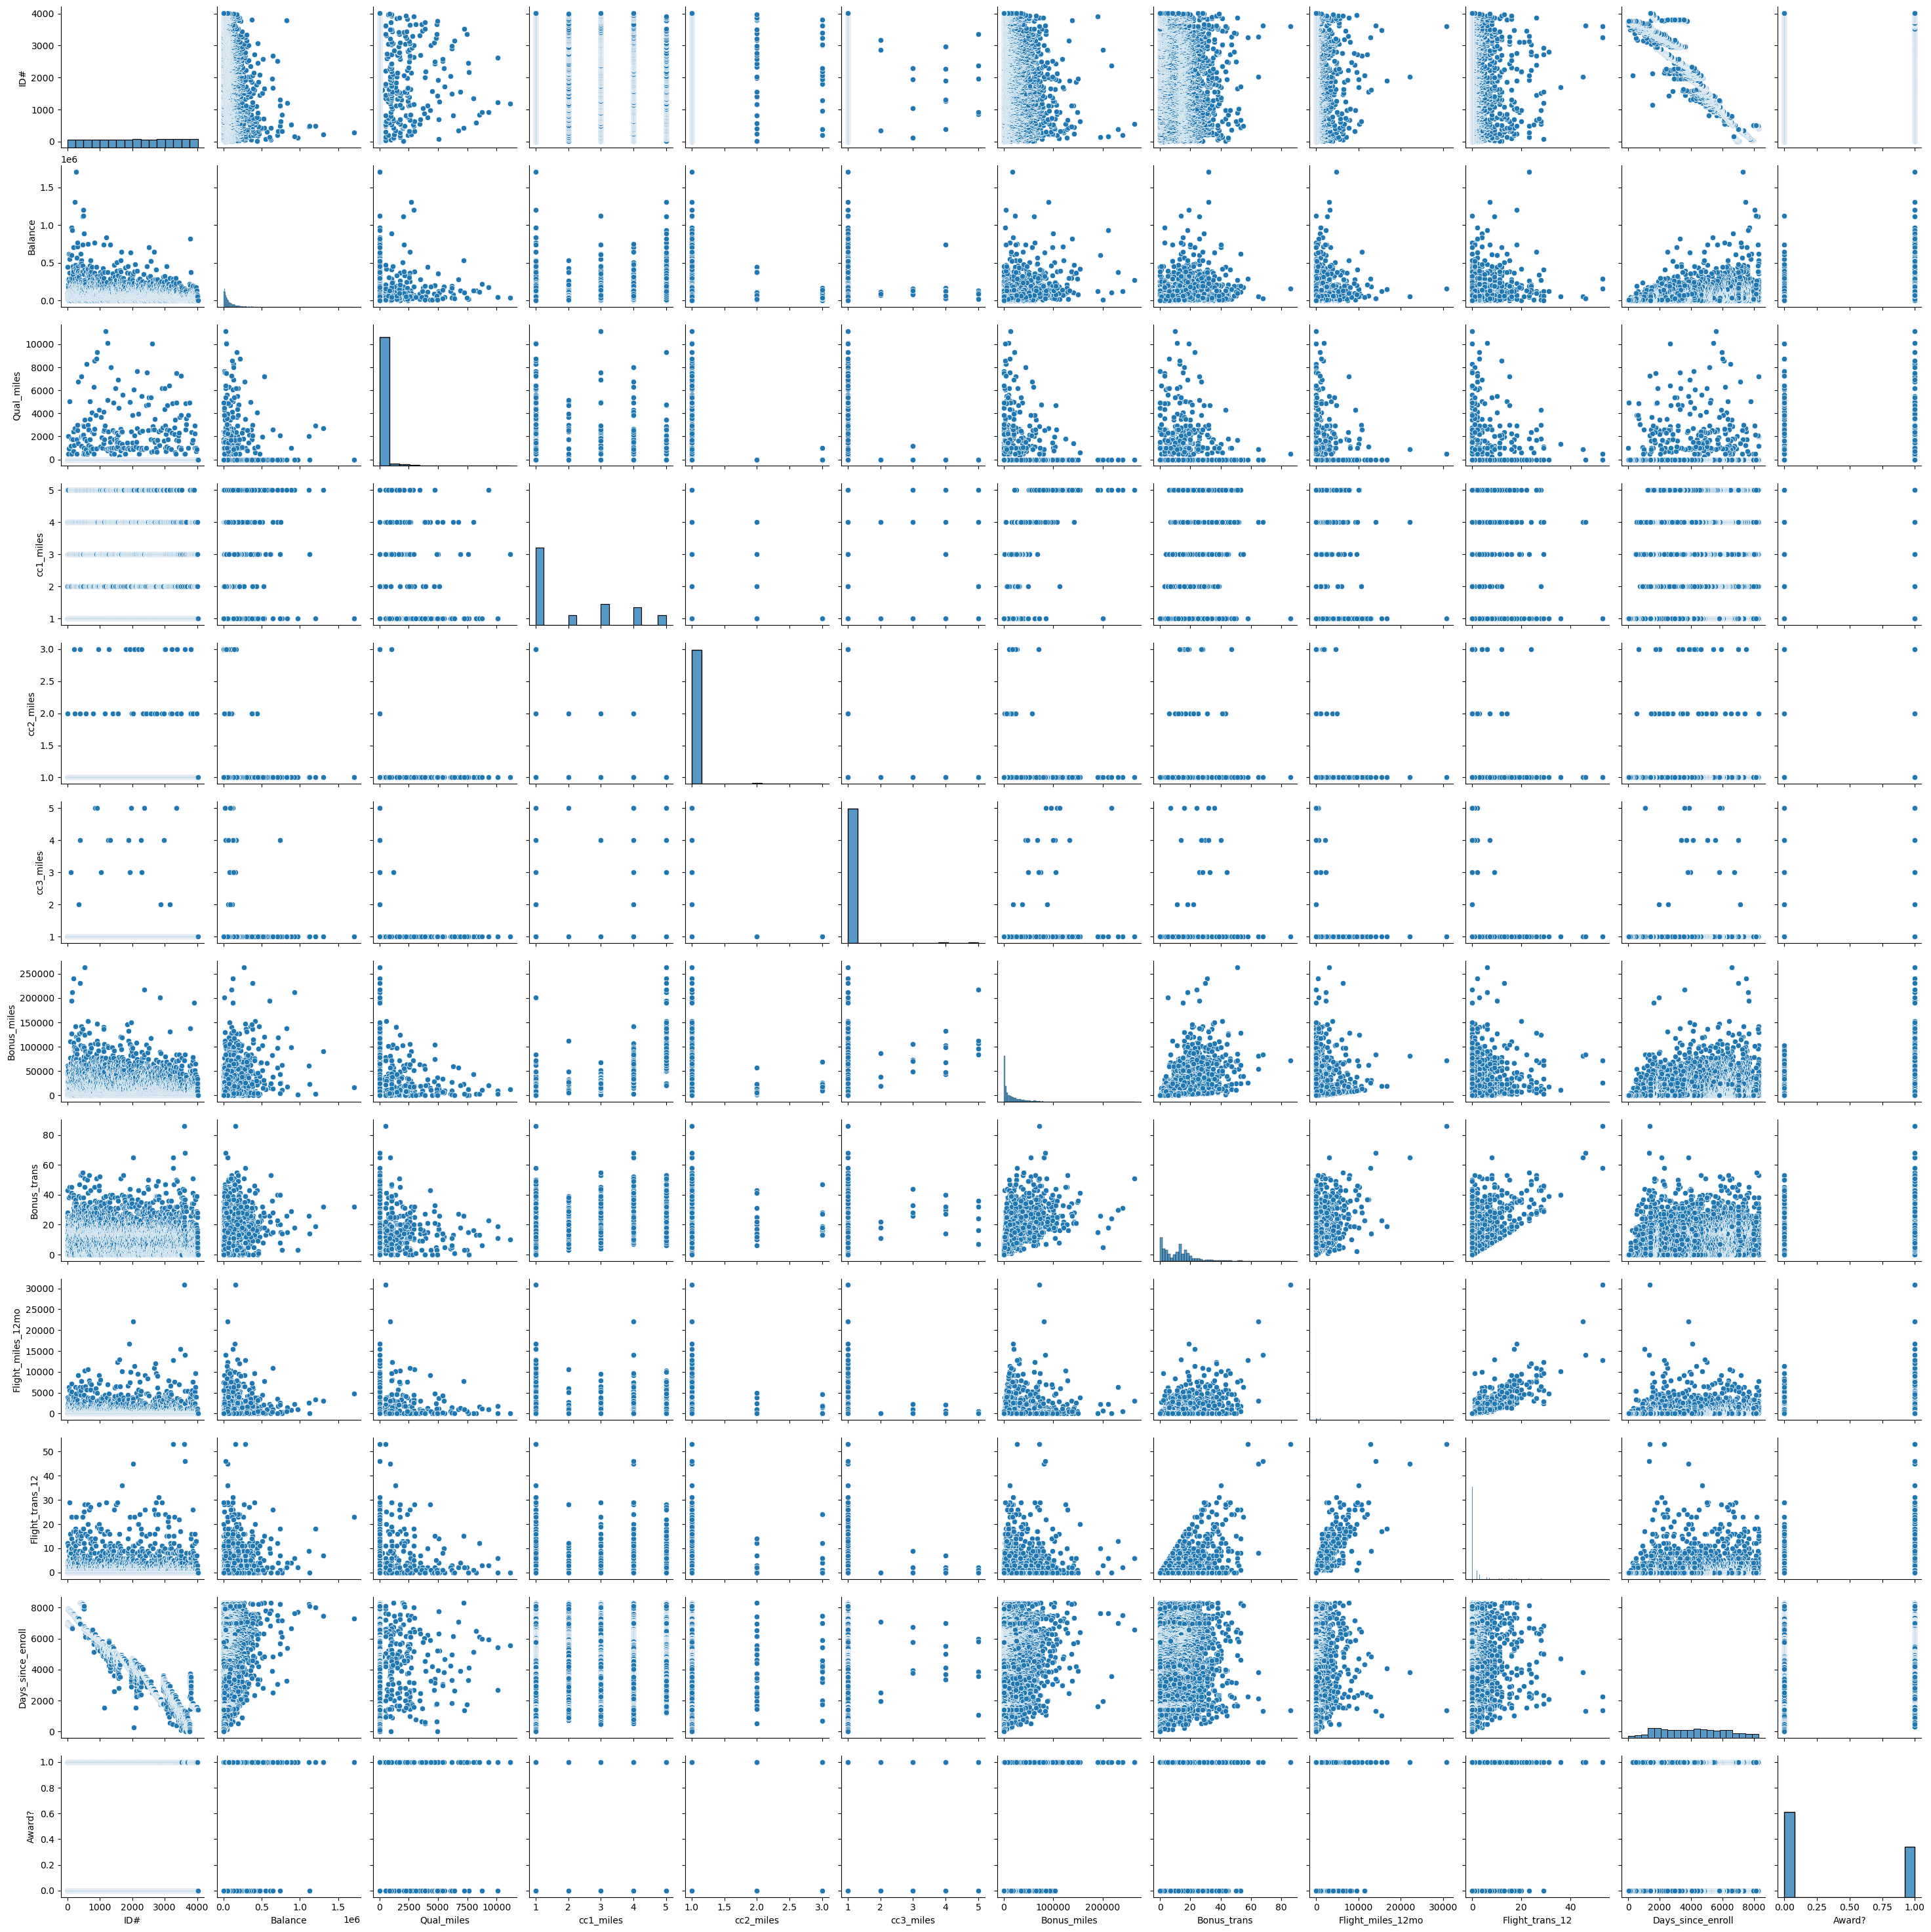

In [4]:
sns.pairplot(df)

<Axes: >

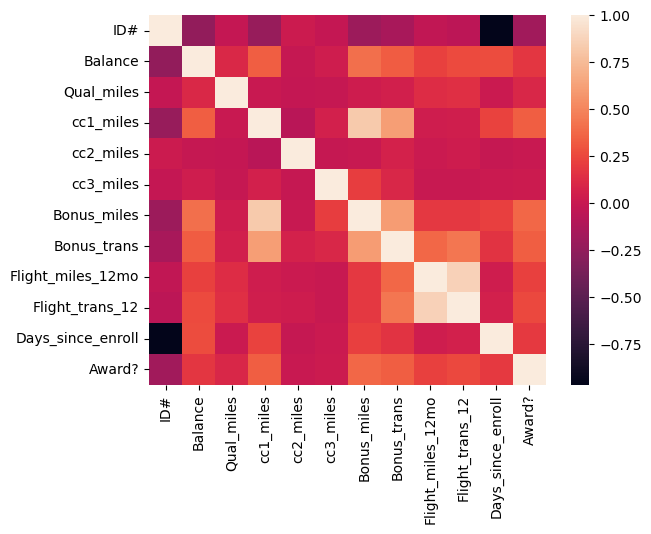

In [7]:
sns.heatmap(df.corr(),annot=False)

In [8]:
df=df.drop('ID#',axis=1)

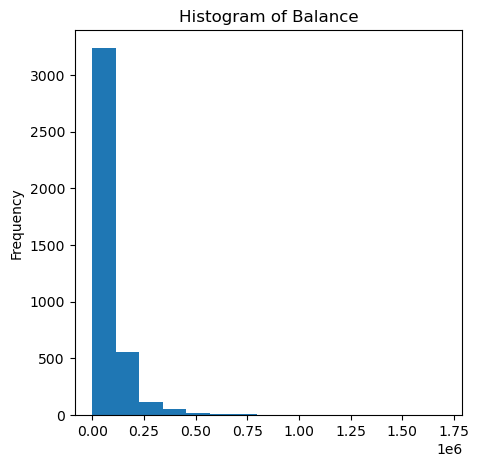

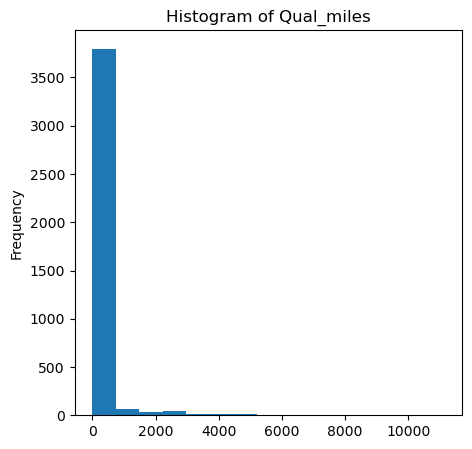

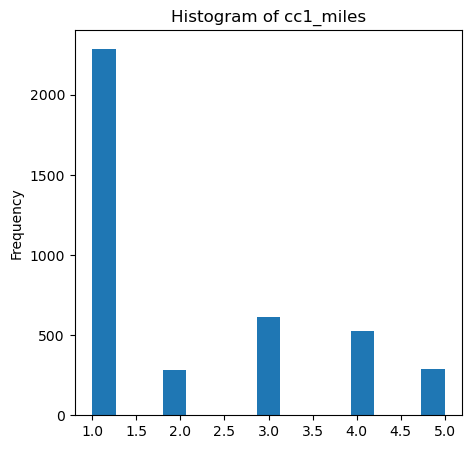

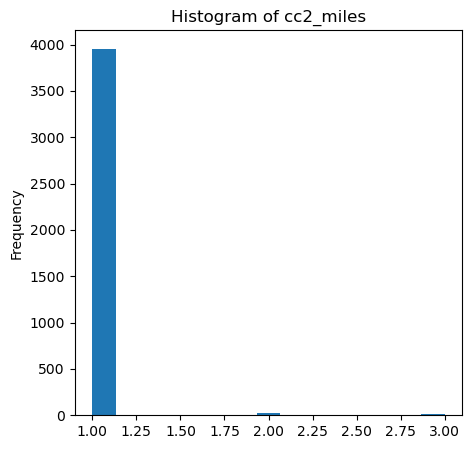

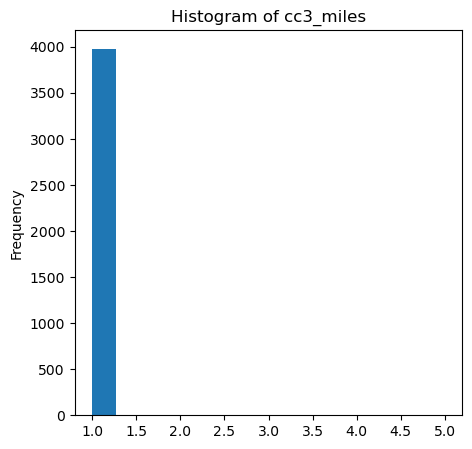

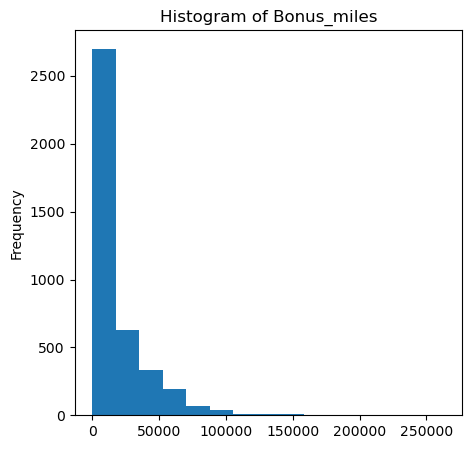

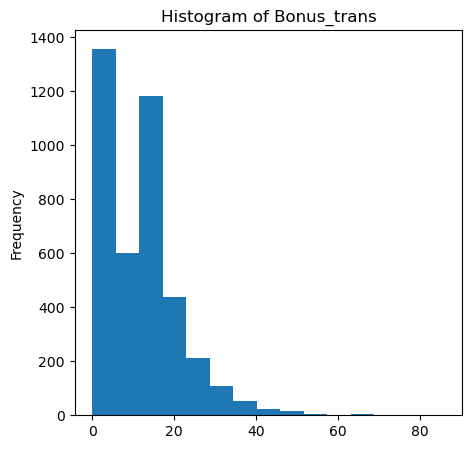

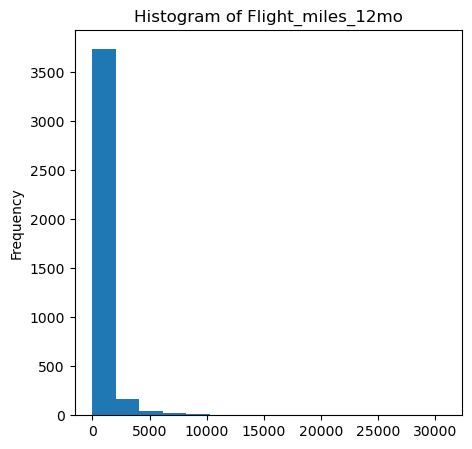

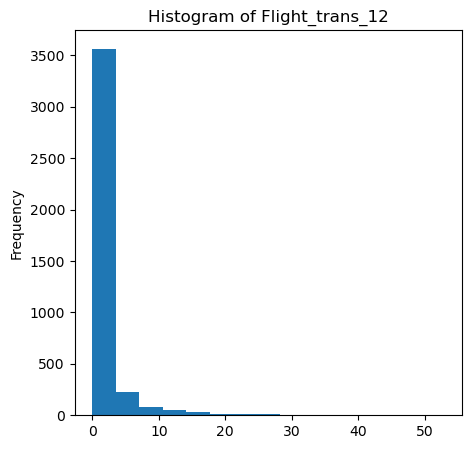

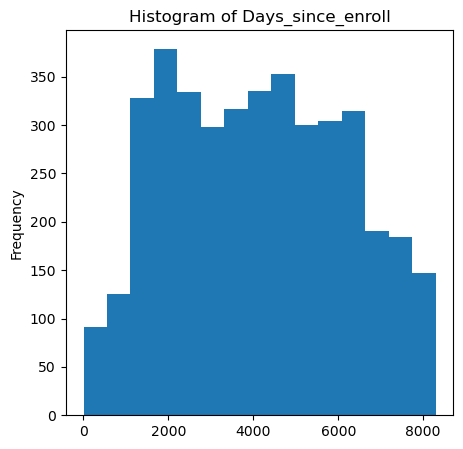

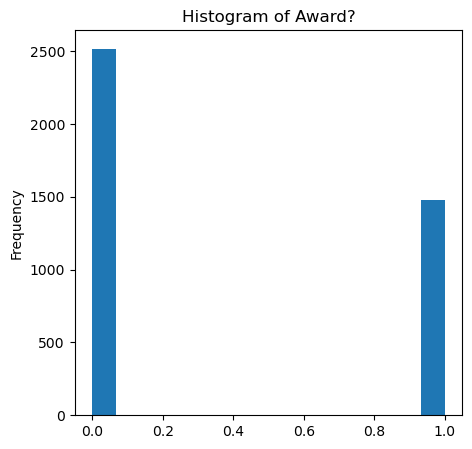

In [9]:
for column in df:
    plt.figure(figsize=(5,5))
    plt.hist(df[column],bins=15)
    plt.title(f'Histogram of {column}')
    plt.xlabel=(column)
    plt.ylabel("Frequency")
    plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scaled_df = mms.fit_transform(df.iloc[:, [0, 5, 6, 7, 8, 9]])
df.iloc[:, [0, 5, 6, 7, 8, 9]] = pd.DataFrame(scaled_df, columns=df.columns[[0, 5, 6, 7, 8, 9]], index=df.index)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508           0          1          1          1     0.000660   
1     0.011288           0          1          1          1     0.000815   
2     0.024257           0          1          1          1     0.015636   
3     0.008667           0          1          1          1     0.001896   
4     0.057338           0          4          1          1     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837           0          1          1          1     0.032330   
3995  0.037766           0          1          1          1     0.003720   
3996  0.043169           0          3          1          1     0.096505   
3997  0.032202           0          1          1          1     0.001896   
3998  0.001769           0          1          1          1     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [10]:
from sklearn.cluster import DBSCAN
import numpy as np
db=DBSCAN(eps=3, min_samples=4, metric='euclidean')
model=db.fit(df)

In [11]:
label = model.labels_
sample_cores = np.zeros_like(label, dtype=bool)
sample_cores[db.core_sample_indices_] = True

In [12]:
n_clusters = len(set(label)) - (1 if -1 in label else 0)
print('No of clusters:', n_clusters)
df['Cluster'] = label
print(df.groupby('Cluster')['Award?'].value_counts())

No of clusters: 5
Cluster  Award?
-1       1          121
         0           65
 0       0         2438
         1         1335
 1       1            8
         0            7
 2       0            3
         1            1
 3       1            3
         0            1
 4       1           13
         0            4
Name: Award?, dtype: int64


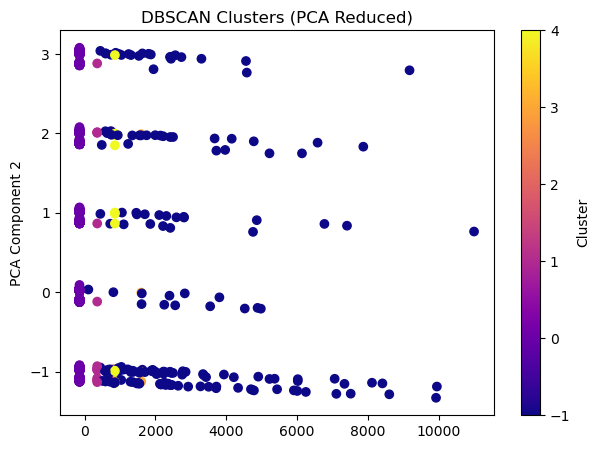

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(7, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=label, cmap='plasma')
plt.title('DBSCAN Clusters (PCA Reduced)')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

We can also specifically choose a feature to cluster them together. Let's do for Bonus miles and awards
Number of clusters: 1


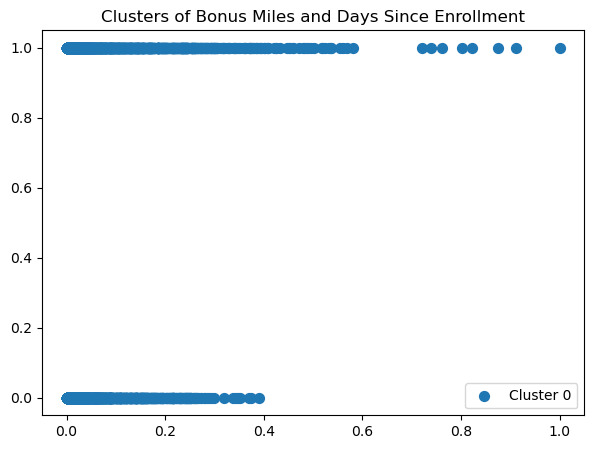

In [14]:
print("We can also specifically choose a feature to cluster them together. Let's do for Bonus miles and awards")
import matplotlib.pyplot as plt
x = df[['Bonus_miles', 'Award?']]
db = DBSCAN(eps=3, min_samples=4, metric='euclidean')
model = db.fit(x)
label = model.labels_

sample_cores = np.zeros_like(label, dtype=bool)
sample_cores[db.core_sample_indices_] = True

n_clusters = len(set(label)) - (1 if -1 in label else 0)
print('Number of clusters:', n_clusters)

y_means = db.fit_predict(x)
plt.figure(figsize=(7, 5))
unique_labels = set(label)
for label in unique_labels:
    if label == -1:
        plt.scatter(x[y_means == label]['Bonus_miles'], x[y_means == label]['Award?'], 
                    s=50, c='black', label='Outliers')
    else:
        plt.scatter(x[y_means == label]['Bonus_miles'], x[y_means == label]['Award?'], 
                    s=50, label=f'Cluster {label}')
        
plt.xlabel=('Bonus_miles')
plt.ylabel=('Award')
plt.title('Clusters of Bonus Miles and Days Since Enrollment')
plt.legend()
plt.show()

We can also specifically choose a feature to cluster them together. Let's do for Bonus miles and days since enroll
Number of clusters: 1


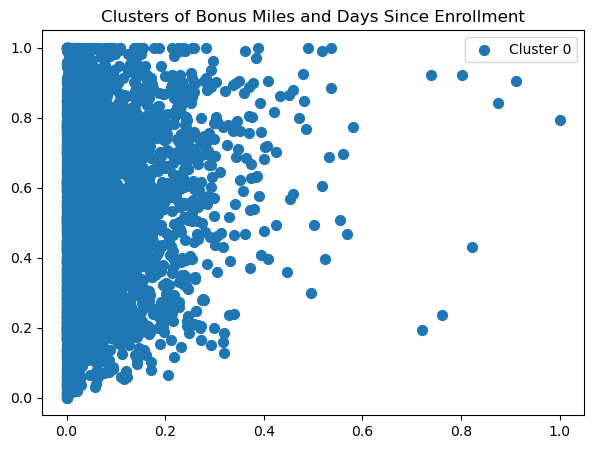

In [15]:
print("We can also specifically choose a feature to cluster them together. Let's do for Bonus miles and days since enroll")
import matplotlib.pyplot as plt
x = df[['Bonus_miles', 'Days_since_enroll']]
db = DBSCAN(eps=3, min_samples=4, metric='euclidean')

model = db.fit(x)
label = model.labels_

sample_cores = np.zeros_like(label, dtype=bool)
sample_cores[db.core_sample_indices_] = True

n_clusters = len(set(label)) - (1 if -1 in label else 0)
print('Number of clusters:', n_clusters)

y_means = db.fit_predict(x)
plt.figure(figsize=(7, 5))
unique_labels = set(label)
for label in unique_labels:
    if label == -1:
        plt.scatter(x[y_means == label]['Bonus_miles'], x[y_means == label]['Days_since_enroll'], 
                    s=50, c='black', label='Outliers')
    else:
        plt.scatter(x[y_means == label]['Bonus_miles'], x[y_means == label]['Days_since_enroll'], 
                    s=50, label=f'Cluster {label}')
        
plt.xlabel=('Bonus_miles')
plt.ylabel=('Days Since Enrollment')
plt.title('Clusters of Bonus Miles and Days Since Enrollment')
plt.legend()
plt.show()

In [50]:
from sklearn.cluster import KMeans
x = df[['Bonus_miles', 'Days_since_enroll']].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss, n_clusters)

C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[281.401142036451, 101.0616497564446, 63.5004576790705, 51.67096456845364, 40.75416590326189, 34.14348291922868, 29.493717171711253, 26.152408340465517, 23.026861961924944, 20.49277641476713] 1


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


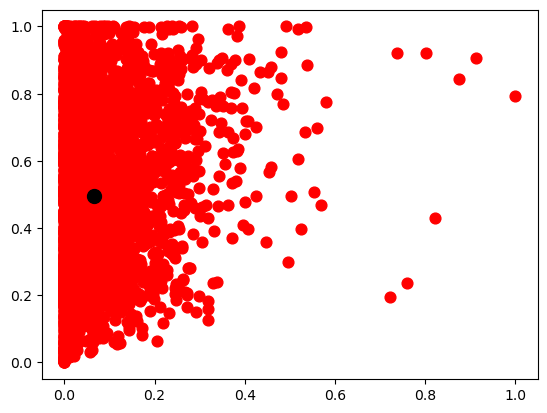

In [51]:
kmeans = KMeans(n_clusters = 1, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

Clustering 'Balance' with 'Award?'
Number of clusters (with Award?): 2


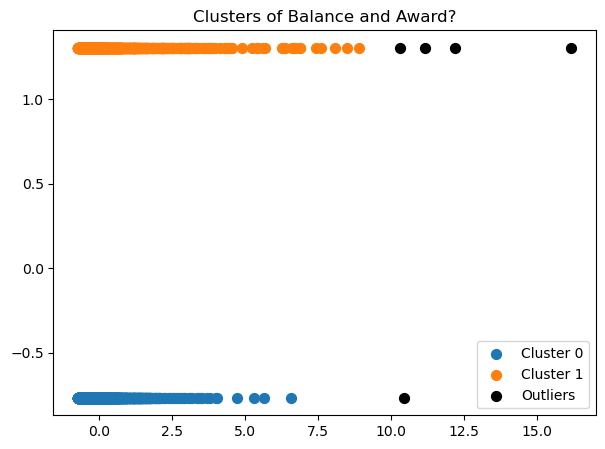

Clustering 'Balance' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


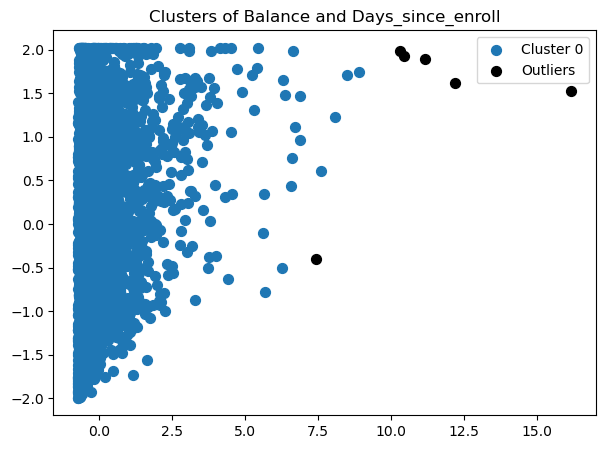

Clustering 'Bonus_miles' with 'Award?'
Number of clusters (with Award?): 3


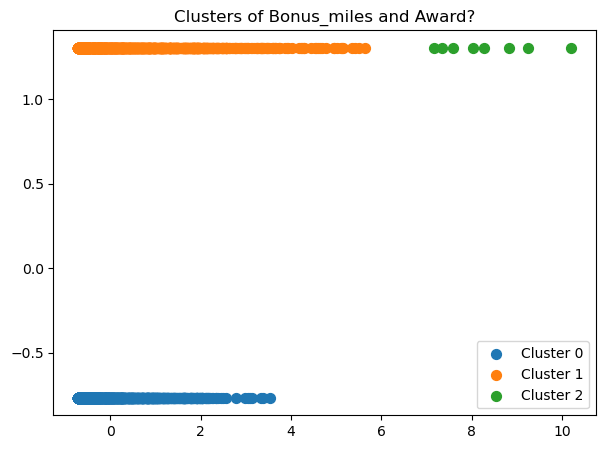

Clustering 'Bonus_miles' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


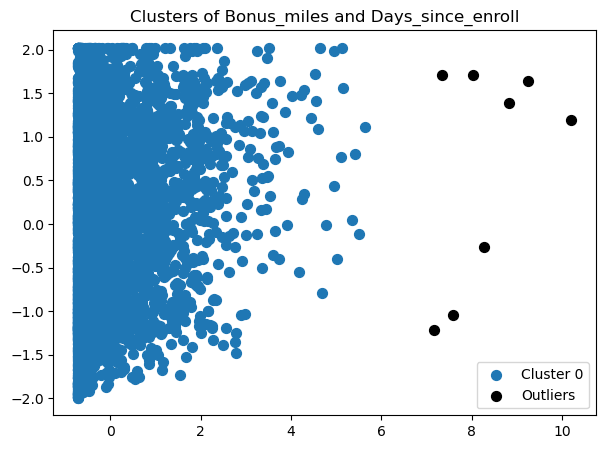

Clustering 'Bonus_trans' with 'Award?'
Number of clusters (with Award?): 2


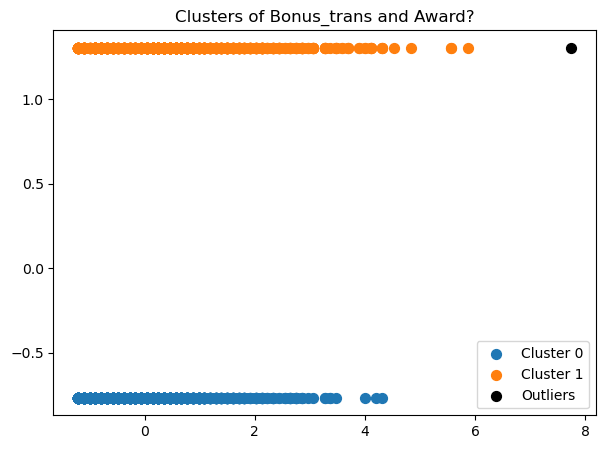

Clustering 'Bonus_trans' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


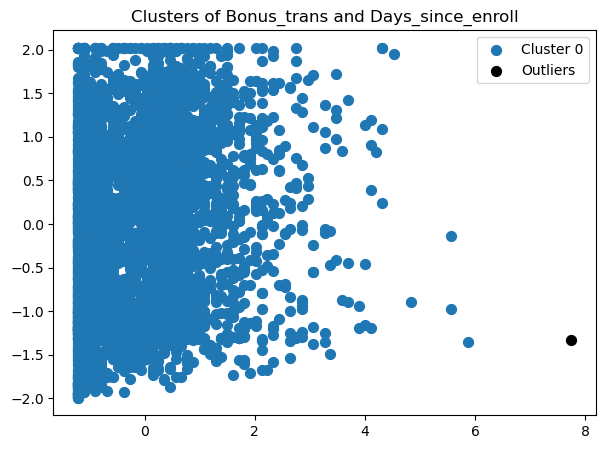

Clustering 'Cluster' with 'Award?'
Number of clusters (with Award?): 8


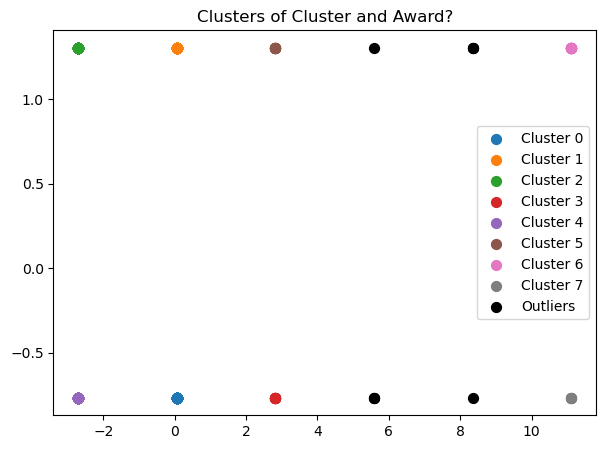

Clustering 'Cluster' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 6


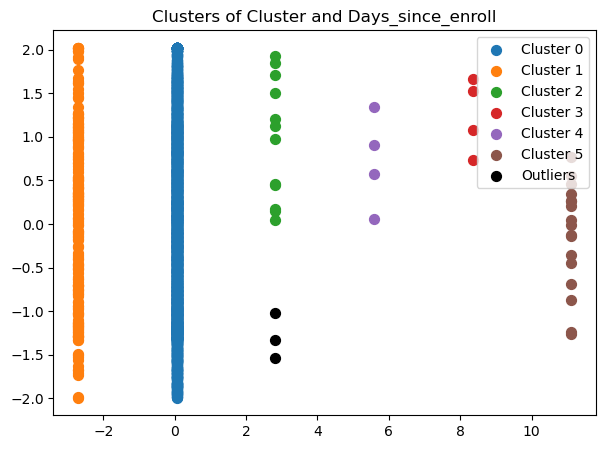

Clustering 'Flight_miles_12mo' with 'Award?'
Number of clusters (with Award?): 2


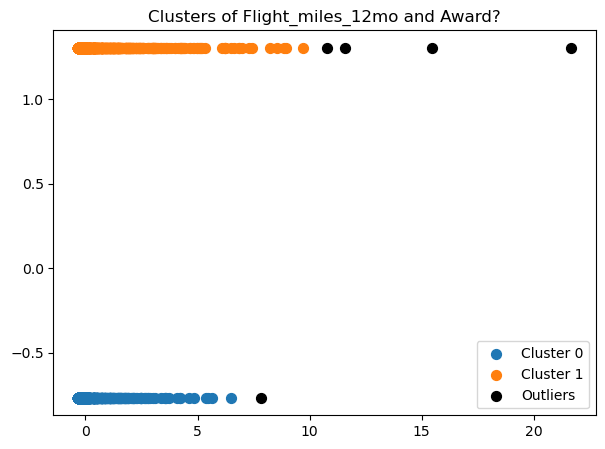

Clustering 'Flight_miles_12mo' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


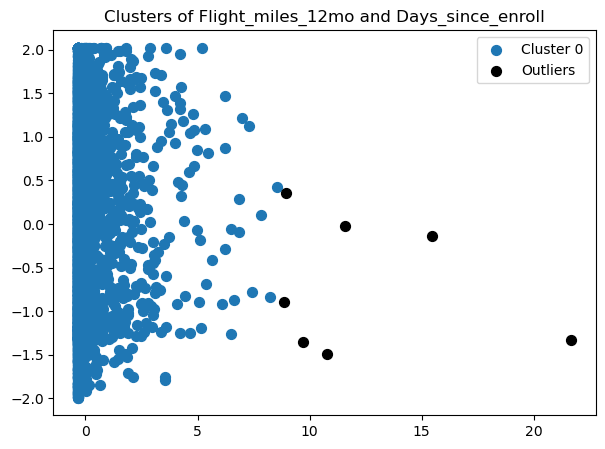

Clustering 'Flight_trans_12' with 'Award?'
Number of clusters (with Award?): 2


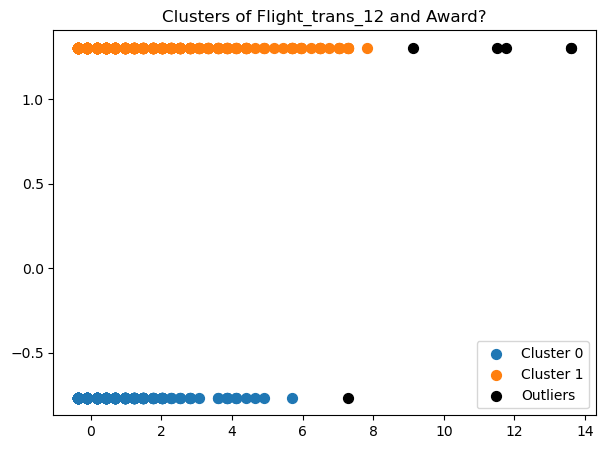

Clustering 'Flight_trans_12' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


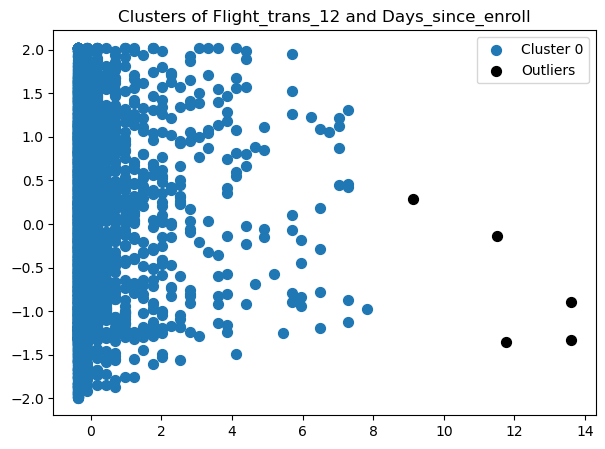

Clustering 'Qual_miles' with 'Award?'
Number of clusters (with Award?): 2


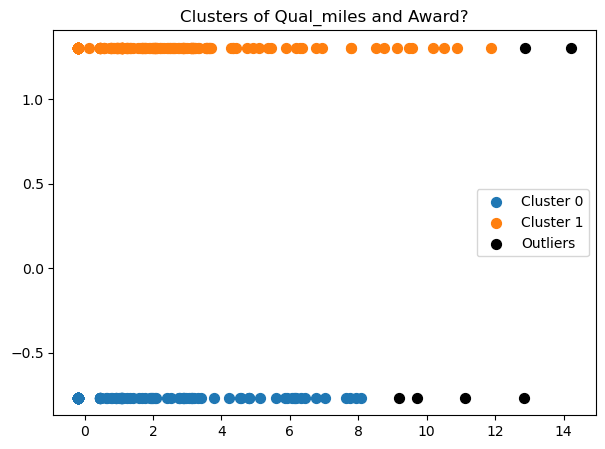

Clustering 'Qual_miles' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


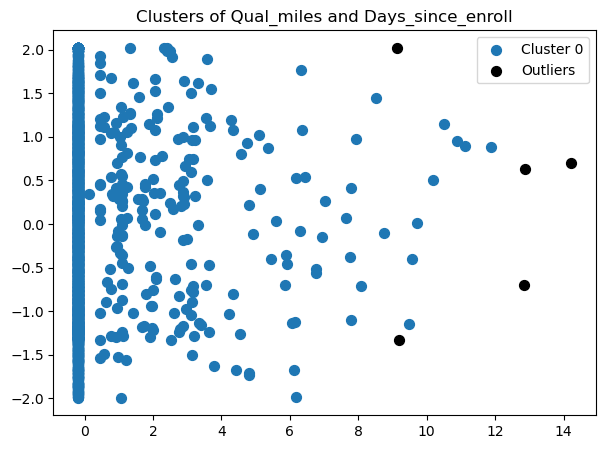

Clustering 'cc1_miles' with 'Award?'
Number of clusters (with Award?): 2


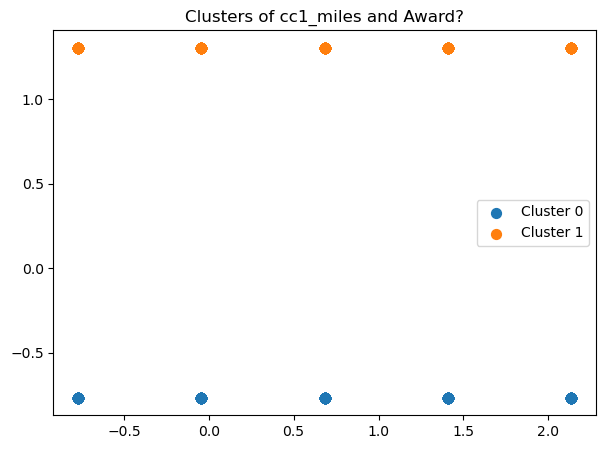

Clustering 'cc1_miles' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 1


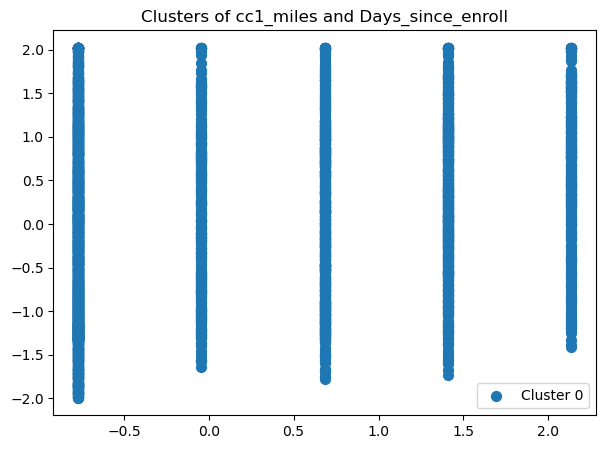

Clustering 'cc2_miles' with 'Award?'
Number of clusters (with Award?): 6


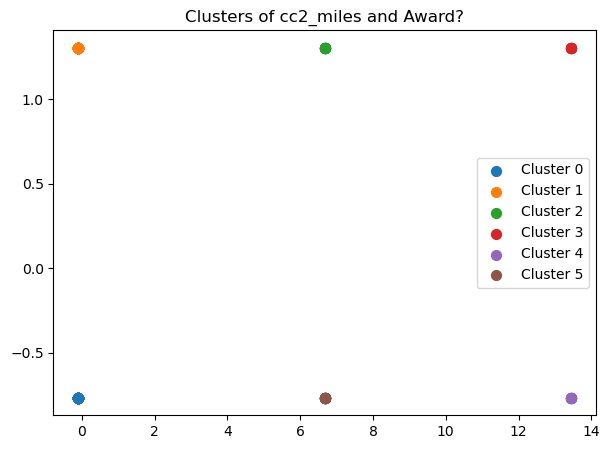

Clustering 'cc2_miles' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 3


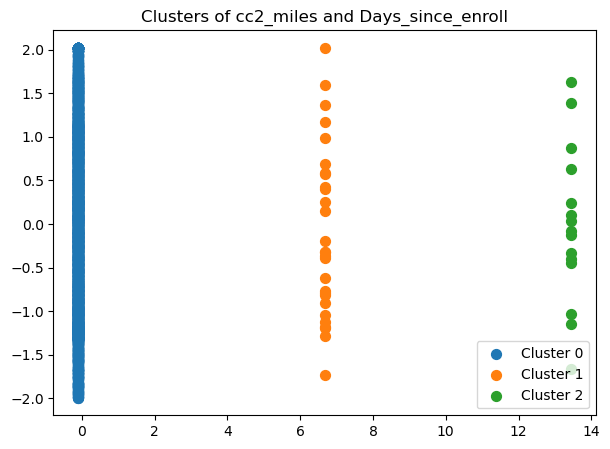

Clustering 'cc3_miles' with 'Award?'
Number of clusters (with Award?): 4


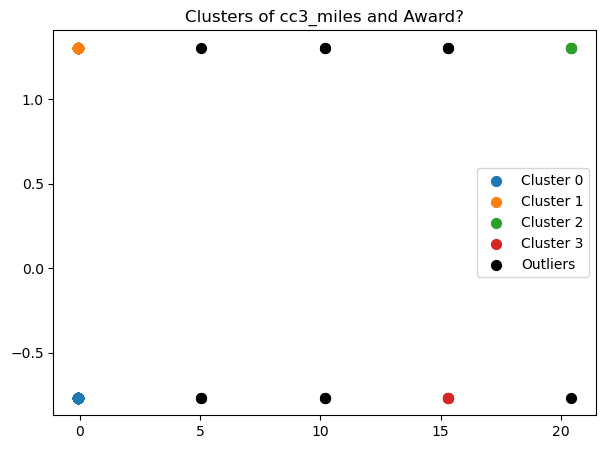

Clustering 'cc3_miles' with 'Days_since_enroll'
Number of clusters (with Days_since_enroll): 3


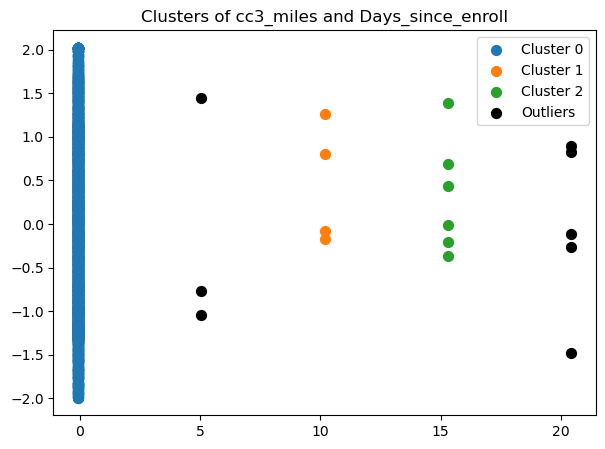

In [69]:
columns = df.columns.difference(['Award?', 'Days_since_enroll'])

# Parameters for DBSCAN
eps = 1
min_samples = 4

# Loop through each column
for col in columns:
    # Pair with 'Award?'
    print(f"Clustering '{col}' with 'Award?'")
    
    x = df[[col, 'Award?']].values
    x_scaled = StandardScaler().fit_transform(x)  # Scale the data
    
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    model = db.fit(x_scaled)
    label = model.labels_
    
    # Number of clusters
    n_clusters = len(set(label)) - (1 if -1 in label else 0)
    print(f"Number of clusters (with Award?): {n_clusters}")
    
    # Plotting
    plt.figure(figsize=(7, 5))
    unique_labels = set(label)
    for cluster_label in unique_labels:
        if cluster_label == -1:
            plt.scatter(x_scaled[label == cluster_label][:, 0], x_scaled[label == cluster_label][:, 1], 
                        s=50, c='black', label='Outliers')
        else:
            plt.scatter(x_scaled[label == cluster_label][:, 0], x_scaled[label == cluster_label][:, 1], 
                        s=50, label=f'Cluster {cluster_label}')
    plt.xlabel=(col)
    plt.ylabel=('Award?')
    plt.title(f"Clusters of {col} and Award?")
    plt.legend()
    plt.show()

    # Pair with 'Days_since_enroll'
    print(f"Clustering '{col}' with 'Days_since_enroll'")
    
    x = df[[col, 'Days_since_enroll']].values
    x_scaled = StandardScaler().fit_transform(x)  # Scale the data
    
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    model = db.fit(x_scaled)
    label = model.labels_
    
    # Number of clusters
    n_clusters = len(set(label)) - (1 if -1 in label else 0)
    print(f"Number of clusters (with Days_since_enroll): {n_clusters}")
    
    # Plotting
    plt.figure(figsize=(7, 5))
    unique_labels = set(label)
    for cluster_label in unique_labels:
        if cluster_label == -1:
            plt.scatter(x_scaled[label == cluster_label][:, 0], x_scaled[label == cluster_label][:, 1], 
                        s=50, c='black', label='Outliers')
        else:
            plt.scatter(x_scaled[label == cluster_label][:, 0], x_scaled[label == cluster_label][:, 1], 
                        s=50, label=f'Cluster {cluster_label}')
    plt.xlabel=(col)
    plt.ylabel=('Days_since_enroll')
    plt.title(f"Clusters of {col} and Days_since_enroll")
    plt.legend()
    plt.show()

Clustering 'Balance' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

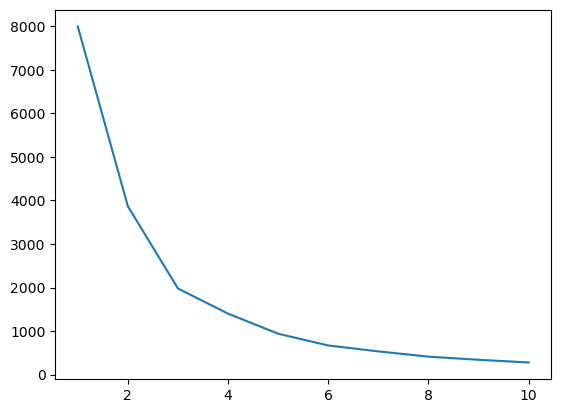

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


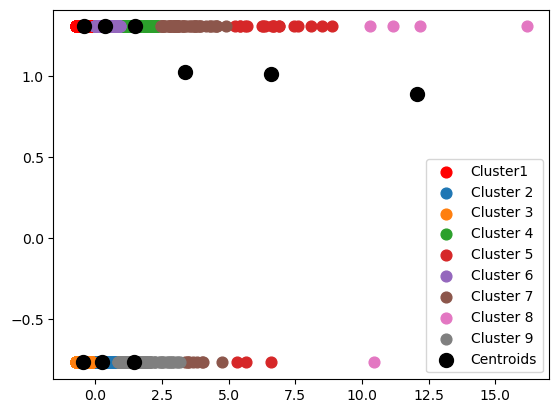

Clustering 'Balance' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

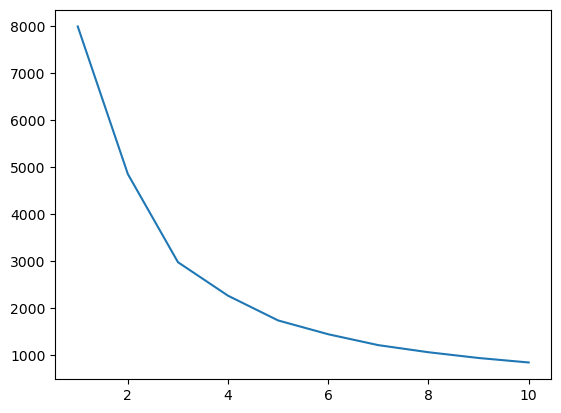

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


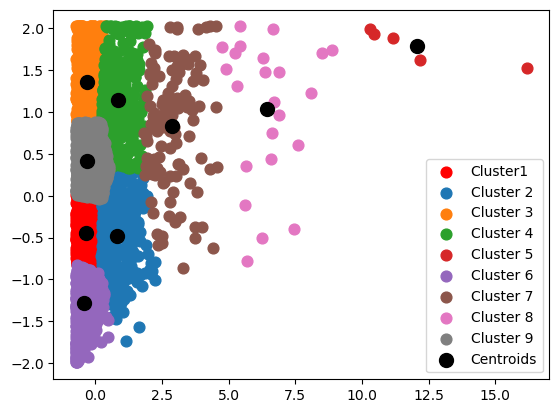

Clustering 'Bonus_miles' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

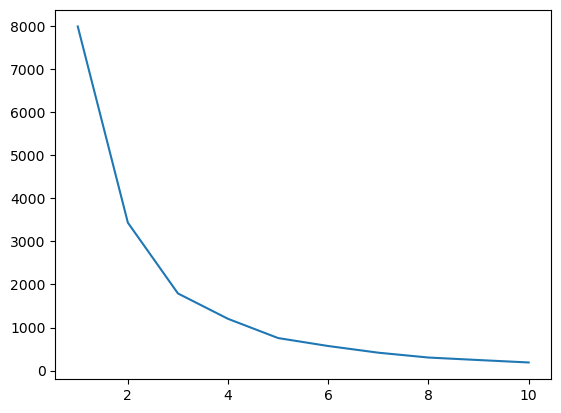

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


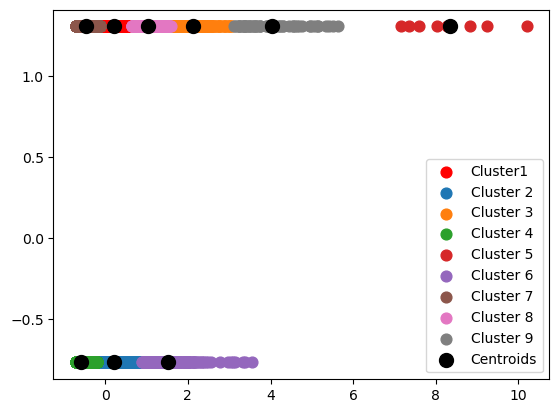

Clustering 'Bonus_miles' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

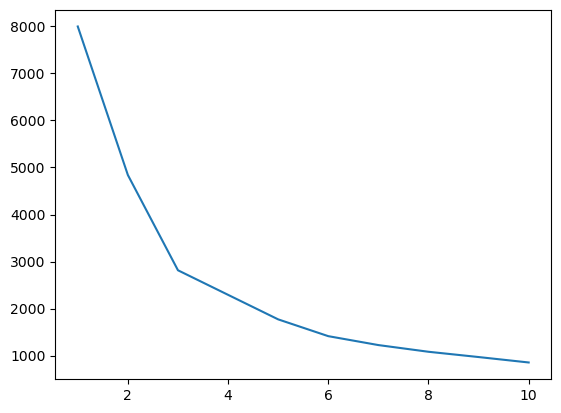

Optimal number of clusters (with Days_since_enroll): 8


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


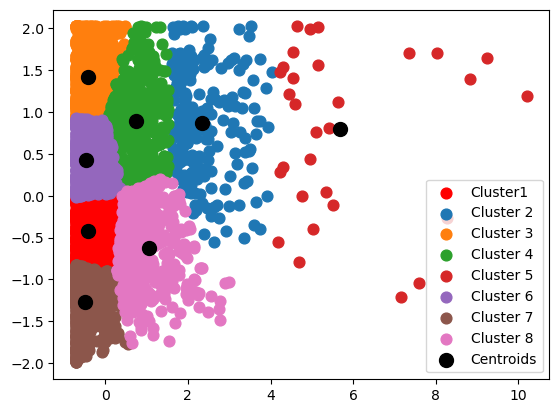

Clustering 'Bonus_trans' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

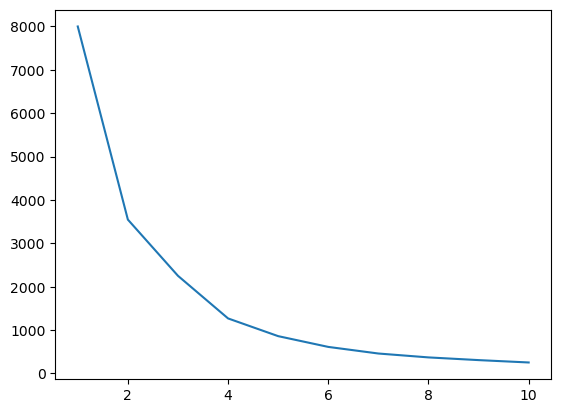

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


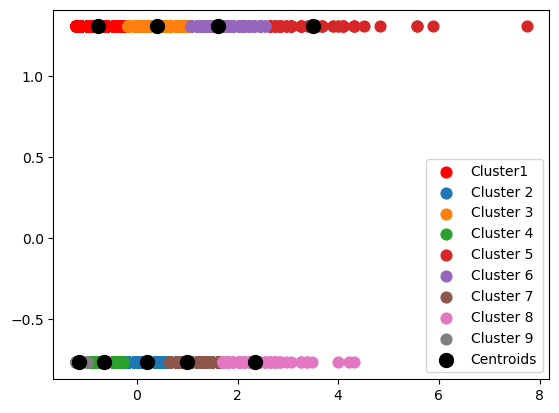

Clustering 'Bonus_trans' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

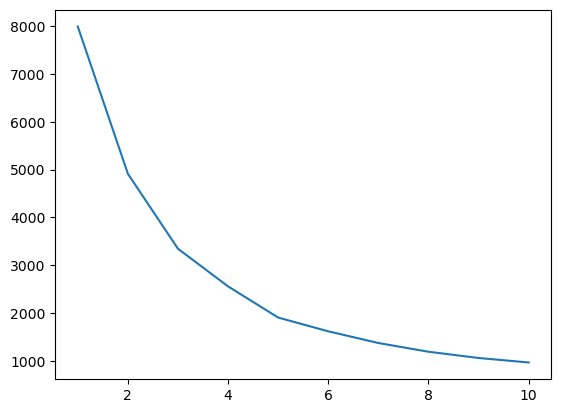

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


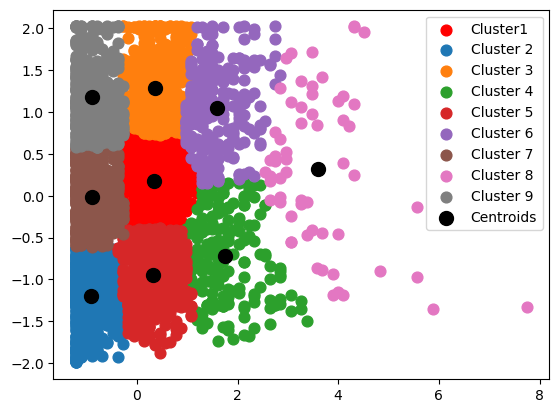

Clustering 'Cluster' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

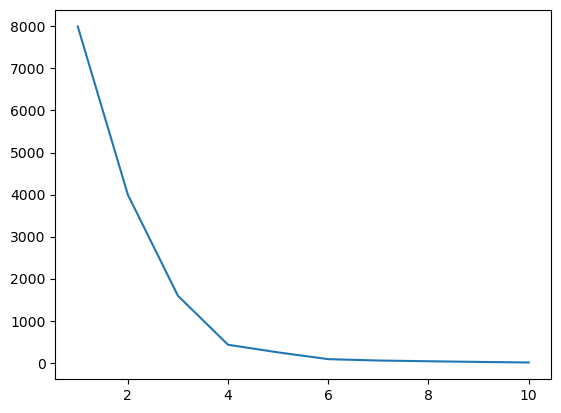

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


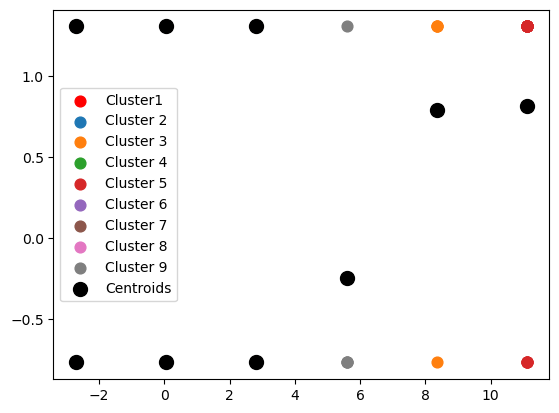

Clustering 'Cluster' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

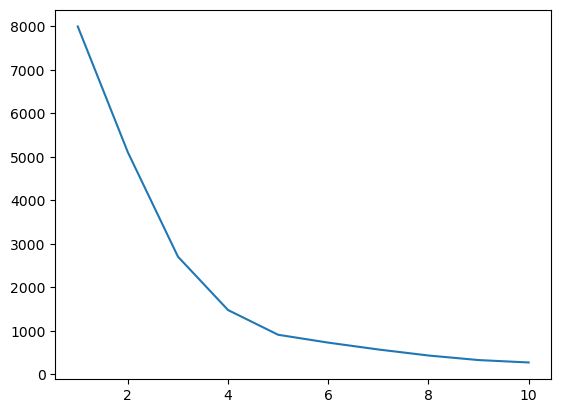

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


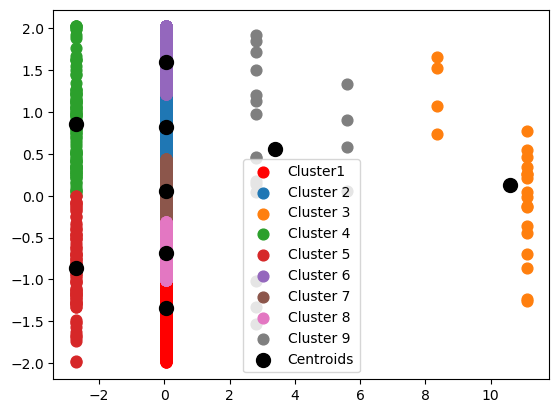

Clustering 'Flight_miles_12mo' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

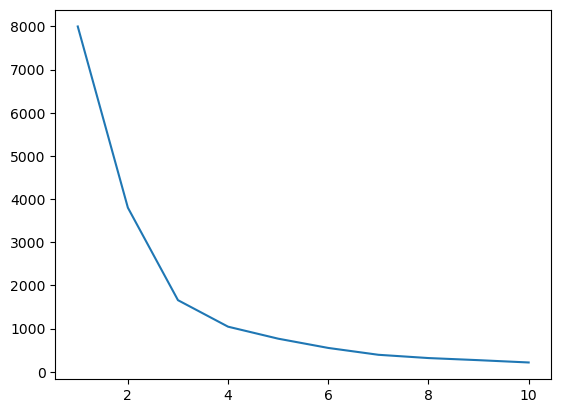

Optimal number of clusters (with Award?): 8


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


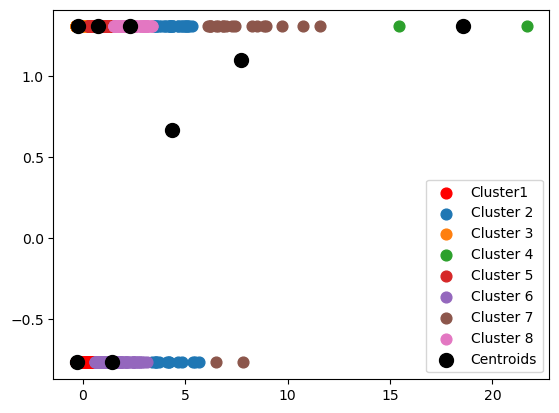

Clustering 'Flight_miles_12mo' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

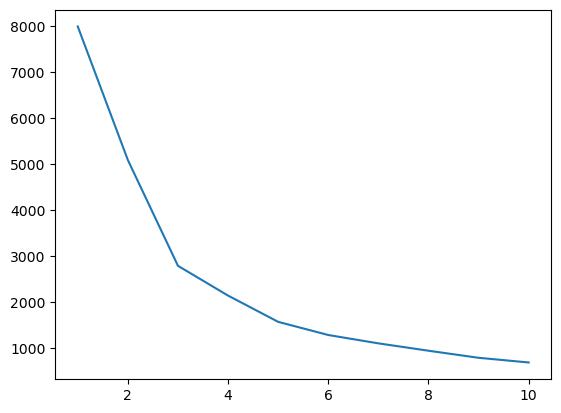

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


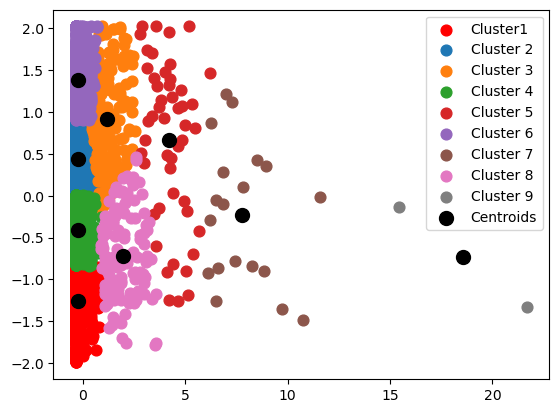

Clustering 'Flight_trans_12' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

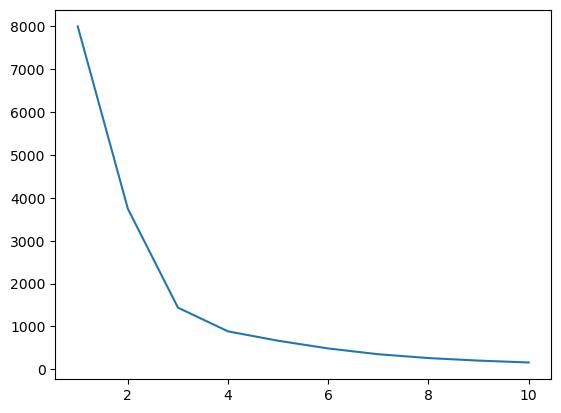

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


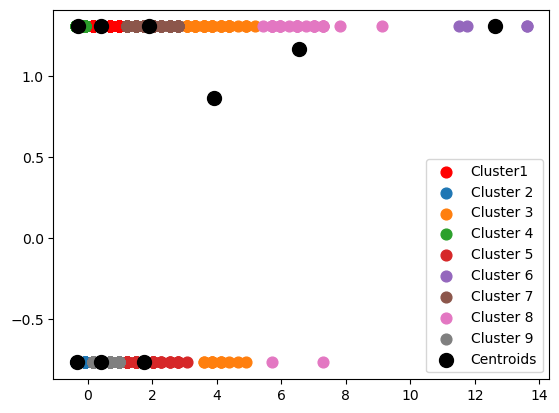

Clustering 'Flight_trans_12' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

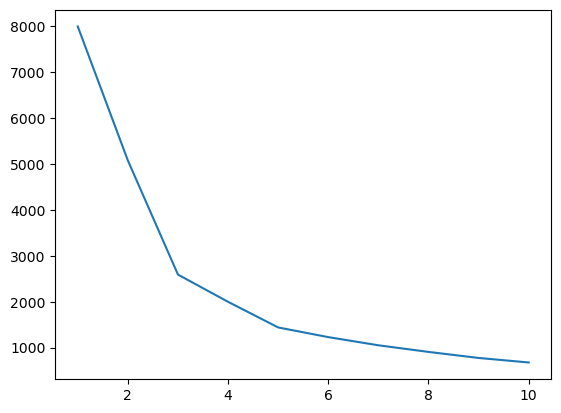

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


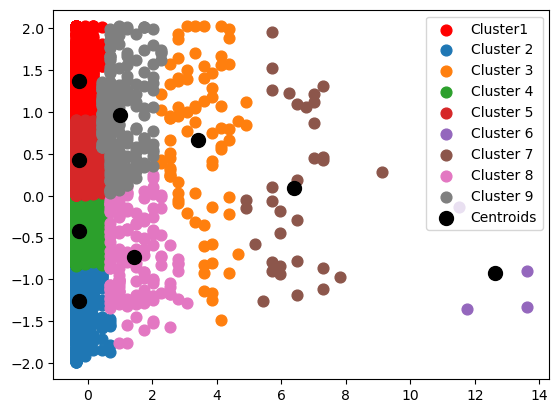

Clustering 'Qual_miles' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

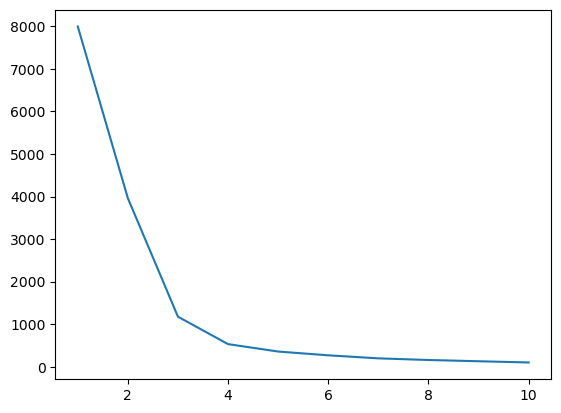

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


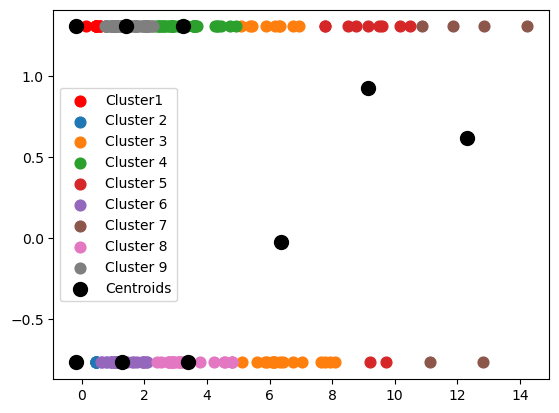

Clustering 'Qual_miles' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

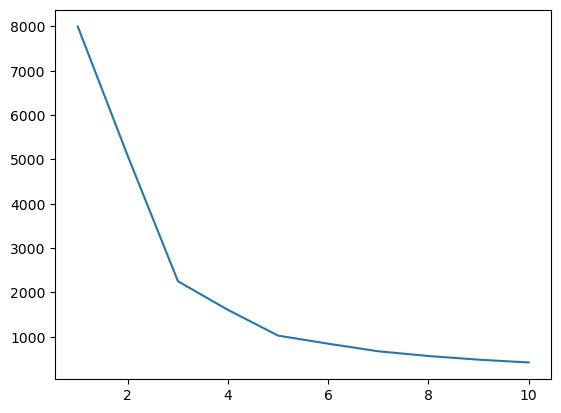

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


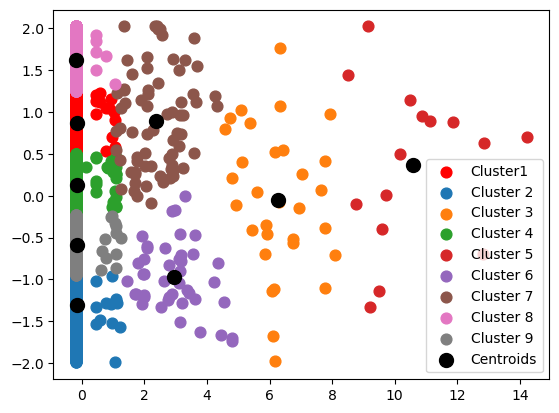

Clustering 'cc1_miles' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

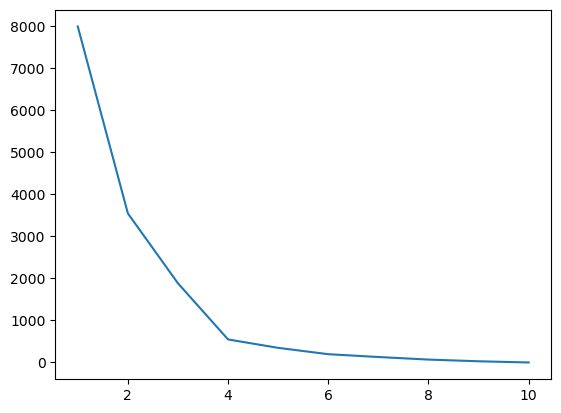

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


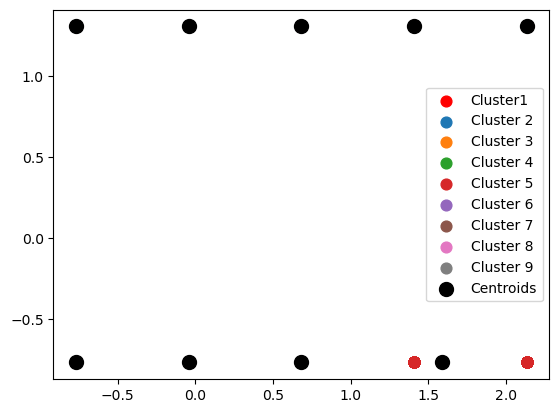

Clustering 'cc1_miles' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

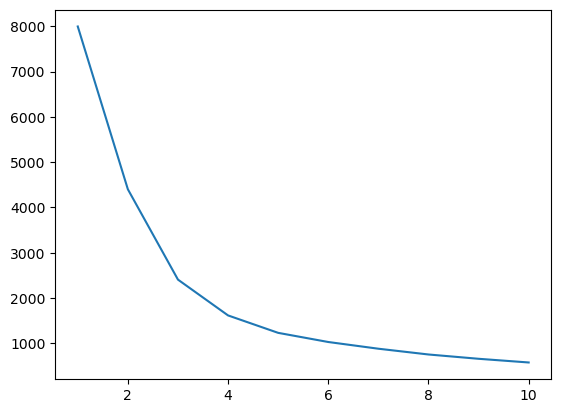

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


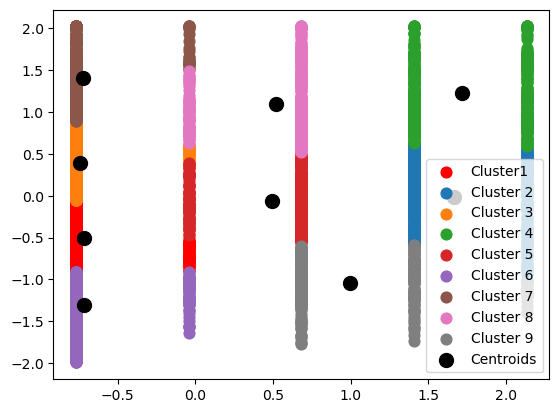

Clustering 'cc2_miles' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

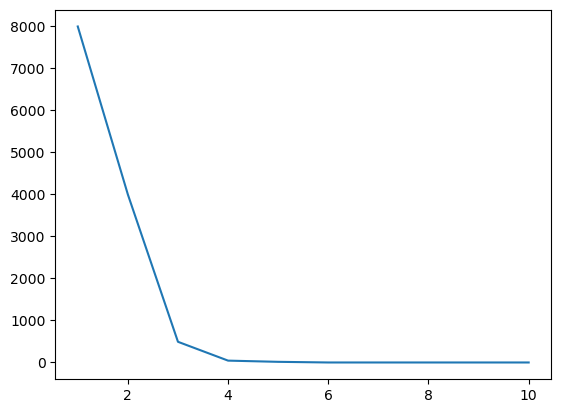

C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


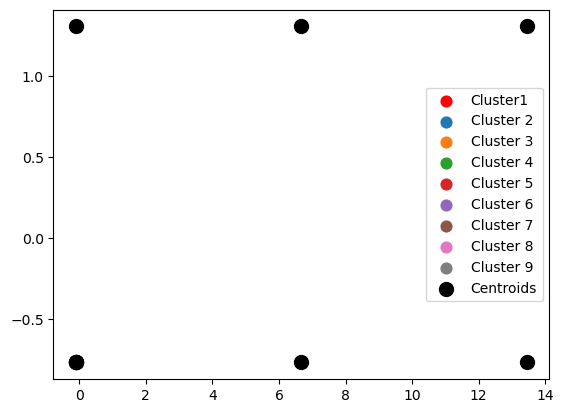

Clustering 'cc2_miles' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

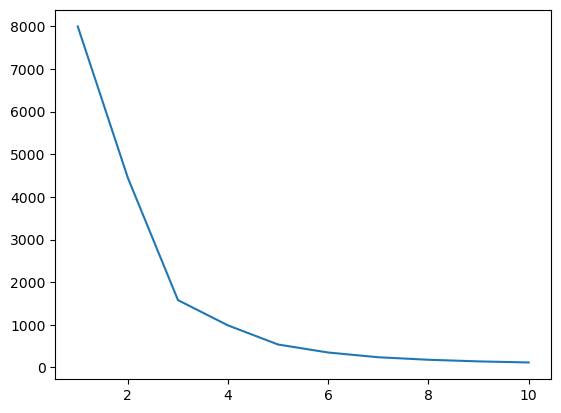

Optimal number of clusters (with Days_since_enroll): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


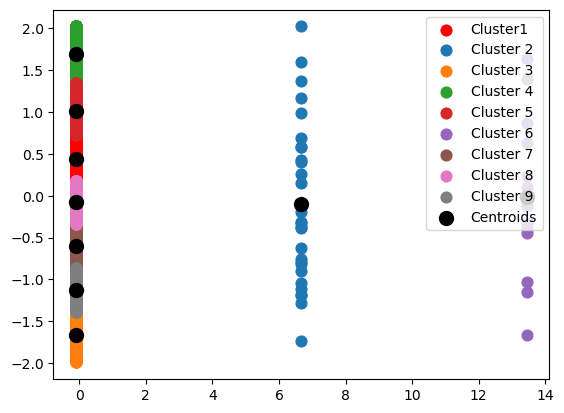

Clustering 'cc3_miles' with 'Award?'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

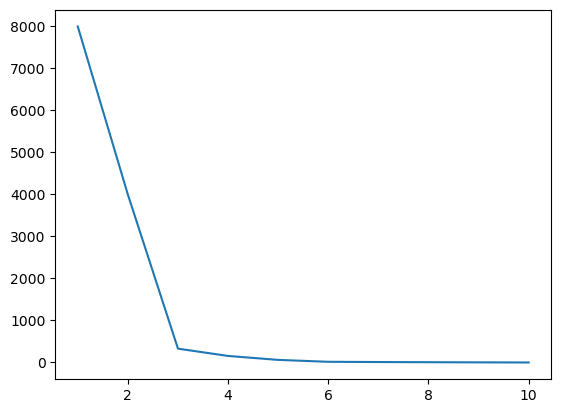

Optimal number of clusters (with Award?): 9


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


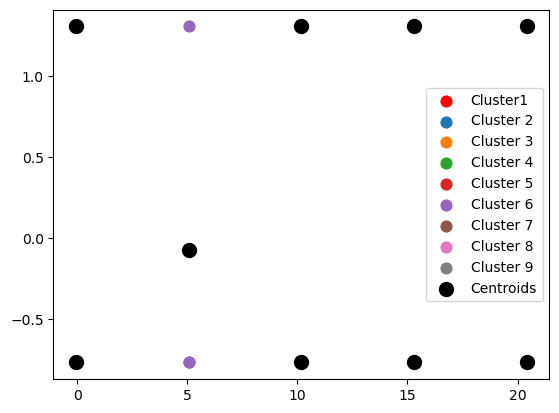

Clustering 'cc3_miles' with 'Days_since_enroll'


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

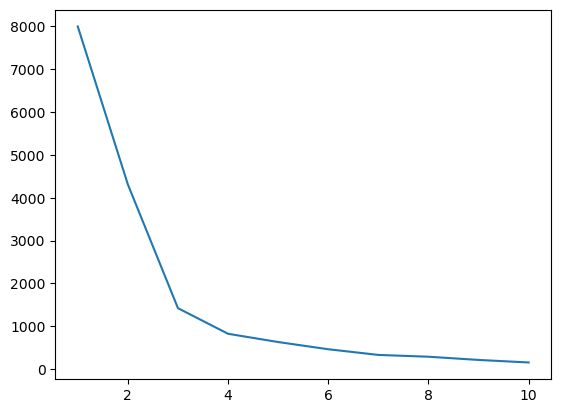

Optimal number of clusters (with Days_since_enroll): 7


C:\Users\polpi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


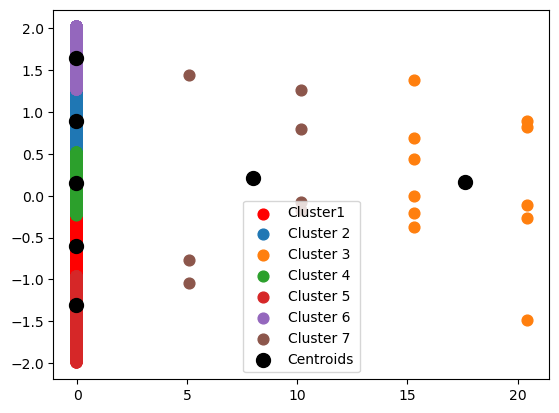

In [71]:
from sklearn.preprocessing import StandardScaler

def get_optimal_clusters(x):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title=('Elbow Method')
    plt.xlabel=('Number of clusters')
    plt.ylabel=('WCSS')
    plt.show()
    
    optimal_clusters = np.argmax(np.diff(wcss)) + 1
    return optimal_clusters

columns = df.columns.difference(['Award?', 'Days_since_enroll'])

for col in columns:
    print(f"Clustering '{col}' with 'Award?'")
    
    x = df[[col, 'Award?']].values
    x_scaled = StandardScaler().fit_transform(x)

    n_clusters = get_optimal_clusters(x_scaled)
    print(f"Optimal number of clusters (with Award?): {n_clusters}")

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(x_scaled)

    plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=60, c='red', label='Cluster1')
    if n_clusters > 1:
        for i in range(1, n_clusters):
            plt.scatter(x_scaled[y_kmeans == i, 0], x_scaled[y_kmeans == i, 1], s=60, label=f'Cluster {i+1}')
    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
    plt.xlabel=(col)
    plt.ylabel=('Award?')
    plt.title=(f"Clusters of {col} and Award?")
    plt.legend()
    plt.show()

    print(f"Clustering '{col}' with 'Days_since_enroll'")
    
    x = df[[col, 'Days_since_enroll']].values
    x_scaled = StandardScaler().fit_transform(x)

    n_clusters = get_optimal_clusters(x_scaled)
    print(f"Optimal number of clusters (with Days_since_enroll): {n_clusters}")

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(x_scaled)

    plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=60, c='red', label='Cluster1')
    if n_clusters > 1:
        for i in range(1, n_clusters):
            plt.scatter(x_scaled[y_kmeans == i, 0], x_scaled[y_kmeans == i, 1], s=60, label=f'Cluster {i+1}')
    
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
    plt.xlabel=(col)
    plt.ylabel=('Days_since_enroll')
    plt.title=(f"Clusters of {col} and Days_since_enroll")
    plt.legend()
    plt.show()


In [19]:
print("KMeans assumes that the clusters are spherical (or convex) and tries to minimize the variance within each cluster (inertia). It works best when clusters are well-separated and of similar size and density.Here Kmeans is able to cluster the data better than DBscan.")
print("DBSCAN (Density-Based Spatial Clustering of Applications with Noise) does not make assumptions about the shape of clusters and instead finds areas of high density to form clusters. It works well with data containing noise or outliers and can detect clusters of varying shapes, but may struggle with datasets where all points are quite close or have overlapping densities. This is exactly what we see here, DBscan is able to cluster the entire data into 1 cluster.")

KMeans assumes that the clusters are spherical (or convex) and tries to minimize the variance within each cluster (inertia). It works best when clusters are well-separated and of similar size and density.Here Kmeans is able to cluster the data better than DBscan.
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) does not make assumptions about the shape of clusters and instead finds areas of high density to form clusters. It works well with data containing noise or outliers and can detect clusters of varying shapes, but may struggle with datasets where all points are quite close or have overlapping densities. This is exactly what we see here, DBscan is able to cluster the entire data into 1 cluster.


In [18]:
print("Please ignore 'Cluster' vs 'Award?' or 'Days_since_enroll'")
print("The DBscan clusters are able to show the outliers in the process, clustering better with eps=1.")
print("Here the clustering has been done keeping 'Award?' and 'Day_since_enroll' either one of the columns.\nThis allows us to cluster the factors that maybe responsible for awards and whether experience or days since enroll has\nan effect on clusters")
print("For example'Balance' is seen to be clustered more with higher 'Days since enroll'")
print("Since awards are given as 0 and 1, we see the clustering at those points. More number of awards are given for Bonus miles")
print("Higher days since enroll shows slightly higher bonus miles, meaning newcomers and older recruits both have almost similar bonus miles.")
print("On the other hand newcomers have comparatively higher 'bonus_trans' i.e, non-flight bonus transactions. \nHigher bonus_trans also shows higher probability of award winning")

Please ignore 'Cluster' vs 'Award?' or 'Days_since_enroll'
The DBscan clusters are able to show the outliers in the process, clustering better with eps=1.
Here the clustering has been done keeping 'Award?' and 'Day_since_enroll' either one of the columns.
This allows us to cluster the factors that maybe responsible for awards and whether experience or days since enroll has
an effect on clusters
For example'Balance' is seen to be clustered more with higher 'Days since enroll'
Since awards are given as 0 and 1, we see the clustering at those points. More number of awards are given for Bonus miles
Higher days since enroll shows slightly higher bonus miles, meaning newcomers and older recruits both have almost similar bonus miles.
On the other hand newcomers have comparatively higher 'bonus_trans' i.e, non-flight bonus transactions. 
Higher bonus_trans also shows higher probability of award winning
